## Binary Classification


In [13]:

import pandas as pd

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/wcbreast_wdbc.csv",
    na_values=['NA','?'])

pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 5)

display(df)

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,...,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,...,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,...,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,...,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,...,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [14]:
from scipy.stats import zscore
# prepare data - apply z-score to all x columns
# Only do this if you have no categoricals (and are sure you 
# want to use z-score across the board)

x_columns = df.columns.drop('diagnosis').drop('id')
for col in x_columns:
    df[col] = zscore(df[col])
    



In [20]:
#convert to numpy-Regression
x = df[x_columns].values
y = df['diagnosis'].map({'M':1,'B':0}).values#binary classification
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [16]:
#functions for ploting roc and auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.

def plot_confusion_matrix(cm,names,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Roc chart example


In [21]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu',
                kernel_initializer='random_normal'))
model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(1,activation='linear',kernel_initializer='random_normal'))
model.compile(loss='binary_crossentropy', 
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics =['accuracy'])
#binary crossentropy coz binary classyfication, 1 output but classification

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
    patience=5, verbose=1, mode='auto', restore_best_weights=True)

model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

Train on 426 samples, validate on 143 samples
Epoch 1/1000
426/426 - 2s - loss: 0.6878 - accuracy: 0.7582 - val_loss: 0.6736 - val_accuracy: 0.9301
Epoch 2/1000
426/426 - 0s - loss: 0.6368 - accuracy: 0.9155 - val_loss: 0.5605 - val_accuracy: 0.9720
Epoch 3/1000
426/426 - 0s - loss: 0.4444 - accuracy: 0.9484 - val_loss: 0.2705 - val_accuracy: 0.9720
Epoch 4/1000
426/426 - 0s - loss: 0.2068 - accuracy: 0.9484 - val_loss: 0.1010 - val_accuracy: 0.9720
Epoch 5/1000
426/426 - 0s - loss: 0.1164 - accuracy: 0.9671 - val_loss: 0.0601 - val_accuracy: 0.9790
Epoch 6/1000
426/426 - 0s - loss: 0.0853 - accuracy: 0.9742 - val_loss: 0.0611 - val_accuracy: 0.9720
Epoch 7/1000
426/426 - 0s - loss: 0.0734 - accuracy: 0.9765 - val_loss: 0.0495 - val_accuracy: 0.9930
Epoch 8/1000
426/426 - 0s - loss: 0.0651 - accuracy: 0.9812 - val_loss: 0.0492 - val_accuracy: 0.9930
Epoch 9/1000
426/426 - 0s - loss: 0.0597 - accuracy: 0.9789 - val_loss: 0.0514 - val_accuracy: 0.9860
Epoch 10/1000
426/426 - 0s - loss: 0

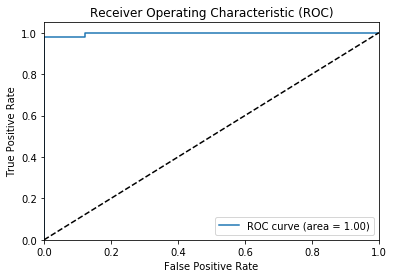

In [23]:
pred=model.predict(x_test)
plot_roc(pred,y_test)

# Multiclass clasification
## error metrics

    

In [36]:
##PREPARE THE DATA!!!##
import pandas as pd
from scipy.stats import zscore

# Read the data set
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

#see how it looks
#now generate dummies for where its needed
df = pd.concat([df,pd.get_dummies(df['job'],prefix='job')],axis=1)
df.drop('job',axis=1,inplace=True)

df = pd.concat([df,pd.get_dummies(df['area'],prefix='area')],axis=1)
df.drop('area',axis=1,inplace=True)

#missing values filing
med =df['income'].median()
df['income'] = df['income'].fillna(med)

#standarize ranges with z-score
df['income']=zscore(df['income'])
df['aspect']=zscore(df['aspect'])
df['save_rate']=zscore(df['save_rate'])
df['age']=zscore(df['age'])
df['subscriptions']=zscore(df['subscriptions'])

#convert to numpy - classification
x_columns=df.columns.drop('product').drop('id')
x=df[x_columns].values

dummies = pd.get_dummies(df['product']) #is for classification
products = dummies.columns
y=dummies.values

In [48]:
##NEURAL NETWORK!!##
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

#split into train/test
x_train, x_test, y_train, y_test = train_test_split(
                                    x,y,test_size=0.25,random_state=42)

model = Sequential()
model.add(Dense(100,input_dim=x.shape[1],activation='relu',
         kernel_initializer='random_normal'))
model.add(Dense(50,activation='relu', kernel_initializer='random_normal'))
model.add(Dense(25,activation='relu', kernel_initializer='random_normal'))
model.add(Dense(y.shape[1],activation='sigmoid', 
         kernel_initializer='random_normal'))
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3,patience=5,
                       verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)


Train on 1500 samples, validate on 500 samples
Epoch 1/1000
1500/1500 - 1s - loss: 1.6164 - accuracy: 0.4733 - val_loss: 1.1600 - val_accuracy: 0.4980
Epoch 2/1000
1500/1500 - 0s - loss: 1.1536 - accuracy: 0.4760 - val_loss: 1.0928 - val_accuracy: 0.4980
Epoch 3/1000
1500/1500 - 0s - loss: 1.0975 - accuracy: 0.4787 - val_loss: 1.0321 - val_accuracy: 0.5020
Epoch 4/1000
1500/1500 - 0s - loss: 0.9899 - accuracy: 0.5147 - val_loss: 0.9497 - val_accuracy: 0.5160
Epoch 5/1000
1500/1500 - 0s - loss: 0.8947 - accuracy: 0.5213 - val_loss: 0.8996 - val_accuracy: 0.5200
Epoch 6/1000
1500/1500 - 0s - loss: 0.8466 - accuracy: 0.5200 - val_loss: 0.8574 - val_accuracy: 0.5260
Epoch 7/1000
1500/1500 - 0s - loss: 0.8179 - accuracy: 0.5240 - val_loss: 0.8271 - val_accuracy: 0.5260
Epoch 8/1000
1500/1500 - 0s - loss: 0.7996 - accuracy: 0.5253 - val_loss: 0.8148 - val_accuracy: 0.5280
Epoch 9/1000
1500/1500 - 0s - loss: 0.7915 - accuracy: 0.5280 - val_loss: 0.8064 - val_accuracy: 0.5300
Epoch 10/1000
150

## calculate classification accuracy
####  acc=c/n
#### c-correct data 
#### n-full data

In [49]:
pred=model.predict(x_test)
pred=np.argmax(pred,axis=1)

In [50]:
from sklearn import metrics
y_compare = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_compare,pred)
score

0.7

## calculate Classification Log Loss

In [58]:
from IPython.display import display

np.set_printoptions(precision=4,suppress=True)
#np.set_printoptions(suppress=True)

pred=model.predict(x_test) 
display(pred[0:5]*100)#as a percent probability
#log loss is looking also for probability of good answer not only if it is good prediction or bad
score = metrics.log_loss(y_test,pred)
print(f'Log loss score is {score}')
#google log loss to see formula

array([[ 0.0005, 25.96  , 91.8853, 51.9662,  0.1933,  0.0041,  0.    ],
       [ 0.0002, 23.2156, 10.3703,  0.0011,  0.0279,  0.0016,  0.    ],
       [ 0.001 , 28.0431, 13.8562,  0.0052,  0.1323,  0.0104,  0.    ],
       [ 0.0009, 28.1607, 60.8507,  1.0233,  0.2281,  0.0091,  0.    ],
       [ 0.    , 17.7952, 96.0121, 27.0705,  0.0169,  0.0001,  0.    ]],
      dtype=float32)

Log loss score is 0.7153806255832315


## confusion matrix


Confusion matrix, without normalization
[[ 21   1   0   0   0   0   0]
 [  4 183  62   0   0   0   0]
 [  0  41 146   0   0   0   0]
 [  0   0  14   0   0   0   0]
 [  0   8   0   0   0   0   0]
 [ 12   5   0   0   0   0   0]
 [  3   0   0   0   0   0   0]]
Normalized confusion matrix
[[0.95 0.05 0.   0.   0.   0.   0.  ]
 [0.02 0.73 0.25 0.   0.   0.   0.  ]
 [0.   0.22 0.78 0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.71 0.29 0.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.  ]]


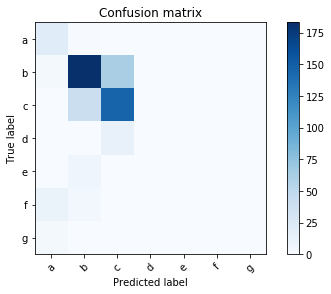

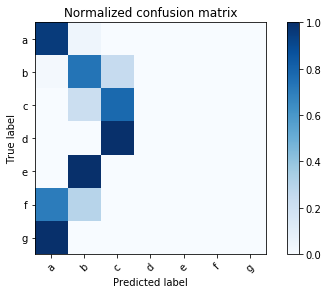

In [61]:
#function to draw it was previously defined
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

pred=model.predict(x_test)
pred=np.argmax(pred,axis=1)
y_compare = np.argmax(y_test,axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_compare, pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, products)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, products, title='Normalized confusion matrix')

plt.show()
